# Ερώτηση 3 (Clustering)

In [3]:
import pandas as pd
import numpy as np
import json
import time 

yelp_dataset_path = '../yelp-dataset/'
buisness_v_path = yelp_dataset_path + 'yelp_academic_dataset_business.json'
leftK_path = '/home/left/Desktop/dataMining/set2/ask2/yelp_academic_dataset_business.json'

dataset_business = []
categories_order = ["Beauty & Spas", "Shopping", "Bars"]

start = time.time()

with open(buisness_v_path, 'r', encoding="utf8") as buisness_file:
    for line in buisness_file:
        json_dict = json.loads(line)
        if  json_dict['city'] == 'Toronto' and \
            json_dict['review_count'] > 10 and \
            json_dict['categories'] is not None and \
            any(word in json_dict['categories'] for word in categories_order):
                temp_cat = [cat for cat in categories_order if cat in json_dict['categories']][0]
                dataset_business.append([json_dict['business_id'], temp_cat])
                

stop = time.time()
print("Read file in {} seconds".format(stop-start))

Read file in 2.097447156906128 seconds


In [4]:
np_business = np.array(dataset_business)
np_business_id = np_business[:,0]
len(np_business)

3265

In [5]:
def get_index(business_id):
    index = np.where(np_business_id == business_id)[0]
    return index

In [6]:
start = time.time()
business_review_txt = [[] for i in range(int(len(np_business)))]
review_v_path = yelp_dataset_path + 'yelp_academic_dataset_review.json'
leftK_path = '/home/left/Desktop/dataMining/set2/ask2/yelp_academic_dataset_review.json'

with open(review_v_path, 'r', encoding="utf8") as reviews_file:
    for line in reviews_file:
        json_dict = json.loads(line)
        index = get_index(json_dict['business_id'])

        if index.size > 0:
            if len(business_review_txt[index[0]]) == 0:
                business_review_txt[index[0]] = json_dict['text']
            else:
                business_review_txt[index[0]] += json_dict['text']

stop = time.time()

print("Read file in {} mins".format((stop-start)/60))

Read file in 5.025982582569123 mins


## TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
fitted_vectorizer = tfidf.fit_transform(business_review_txt)

In [21]:
from sklearn.cluster import KMeans
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
#from sklearn.metrics import confusion_matrix

kmeans = sk_cluster.KMeans(n_clusters=3)
predictions = kmeans.fit_predict(fitted_vectorizer)
y_pred = kmeans.labels_

print(predictions)
#p = metrics.precision_score(true_labels, y_pred, average=None)

[0 0 1 ... 0 2 0]


Text(0.5, 1.0, 'Kmeans cluster centroids')

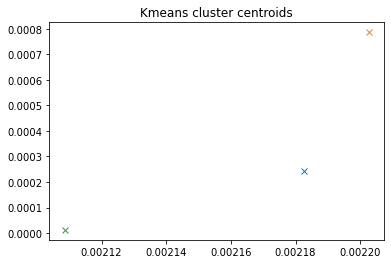

In [51]:
import matplotlib.pyplot as plt 

for centroids in kmeans.cluster_centers_:
    plt.plot(centroids[0], centroids[1], marker='x')
plt.title('Kmeans cluster centroids')

In [52]:
kmeans.cluster_centers_.shape


(3, 107776)

In [9]:
true_labels = np_business[:,1]
for i in range(len(true_labels)):
    if true_labels[i]=='Bars':
        true_labels[i]=0
    if true_labels[i]=='Beauty & Spas':
        true_labels[i]=1
    if true_labels[i]=='Shopping':
        true_labels[i]=2

In [10]:
y_pred

array([0, 0, 2, ..., 0, 1, 0])

In [61]:
true_labels = [int(i) for i in true_labels] 

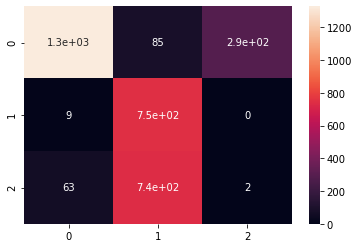

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cf_matrix = confusion_matrix(true_labels, y_pred)
sns.heatmap(cf_matrix, annot=True)

In [ ]:
data_for_agglo = fitted_vectorizer.todense()

from sklearn.cluster import AgglomerativeClustering
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
predictions = agglomerative.fit_predict(data_for_agglo)


# MAKE CONF MATRIX HERE FOR 'WARD' PREC/REC ETC.

In [ ]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
predictions = agglomerative.fit_predict(data_for_agglo)

# MAKE CONF MATRIX HERE FOR ;COMPLETE' PREC/REC ETC.

In [ ]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
predictions = agglomerative.fit_predict(data_for_agglo)

# MAKE CONF MATRIX HERE FOR 'AVERAGE' PREC/REC ETC.

In [ ]:
agglomerative = sk_cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
predictions = agglomerative.fit_predict(data_for_agglo)

# MAKE CONF MATRIX HERE FOR 'SINGLE' PREC/REC ETC.